<a href="https://colab.research.google.com/github/luizammatos/ufpa-engmec/blob/main/cinematica_mecanismos_Luiza_Matos_202102140015_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




LISTA DE CINEMÁTICA DOS MECANISMOS
1 - Biela-Manivela
2 - Manivela-Alavanca
3 - Análise de Trajetória
4 - Newton-Raphson (4 Barras)
0 - Sair
Escolha uma opção: 4

Resultado: [16.65377193 80.77248683]


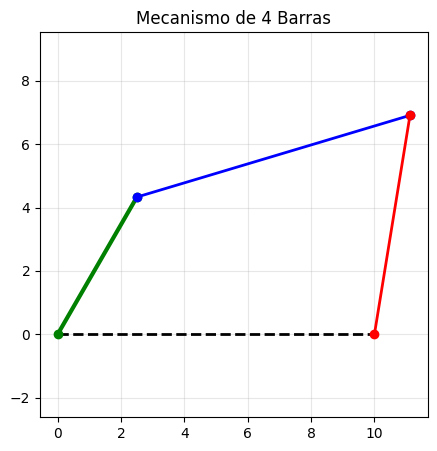

In [ ]:
# ==========================================================
# LISTA DE CINEMÁTICA DE MECANISMOS - P2 | 04/02/2026
# Engenharia Mecânica - UFPA
# Aluna: Luiza Maria Matos de Moraes - 202102140015
# Professor: Dr. Fábio Antônio do Nascimento Setúbal
# Implementação em Python
# Com menu interativo para que o senhor não rode vários códigos.
# ==========================================================

import math
import numpy as np
import matplotlib.pyplot as plt
import os

# Cria a pasta 'graficos' automaticamente
if not os.path.exists("graficos"):
    os.makedirs("graficos")



# ========================
# FUNÇÕES AUXILIARES
# ========================

def graus_para_rad(ang):
    """
    Converte ângulo de graus para radianos.
    """
    return ang * math.pi / 180


def rad_para_graus(ang):
    """
    Converte ângulo de radianos para graus.
    """
    return ang * 180 / math.pi


# ==========================================================
# EXERCÍCIO 1 - BIELA MANIVELA
# ==========================================================

def resolver_biela_manivela(c2, c3, c4, t2_deg):
    """
    Resolve a posição angular da biela (t3) e o deslocamento
    do cursor (c1) em um mecanismo biela-manivela.

    Entradas:
    c2 -> comprimento da manivela
    c3 -> comprimento da biela
    c4 -> deslocamento vertical
    t2_deg -> ângulo da manivela em graus

    Saída:
    Retorna duas possíveis configurações:
    - aberta
    - cruzada
    """
    t2 = graus_para_rad(t2_deg)

    # Expressão derivada da geometria do mecanismo
    arg = (c4 - c2 * math.sin(t2)) / c3

    # Garante que o argumento do arco seno esteja dentro
    # do intervalo matematicamente válido [-1, 1]
    arg = max(-1, min(1, arg))

    # Duas soluções possíveis para o arco seno
    t3_aberto = math.asin(arg)
    t3_cruzado = math.pi - t3_aberto

    # Cálculo do deslocamento linear do cursor (c1)
    c1_aberto = c2 * math.cos(t2) + c3 * math.cos(t3_aberto)
    c1_cruzado = c2 * math.cos(t2) + c3 * math.cos(t3_cruzado)

    return {
        "aberto": (rad_para_graus(t3_aberto), c1_aberto),
        "cruzado": (rad_para_graus(t3_cruzado), c1_cruzado)
    }


def plot_biela_manivela(c2, c3, c4, t2_deg, res):
    """
    Gera o gráfico geométrico do mecanismo biela-manivela
    para as duas configurações possíveis.
    """
    t2 = graus_para_rad(t2_deg)

    # Coordenadas do ponto A (fim da manivela)
    Ax, Ay = c2 * math.cos(t2), c2 * math.sin(t2)

    plt.figure(figsize=(5,5))

    # Plota as duas configurações: aberta e cruzada
    for key, style in zip(["aberto", "cruzado"], ["b-o", "r--s"]):
        t3_deg, c1 = res[key]
        plt.plot([0, Ax, c1], [0, Ay, c4], style, lw=2, label=key.capitalize())

    L = (c2 + c3) * 1.2
    plt.xlim(-L, L)
    plt.ylim(-L, L)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.title("Mecanismo Biela-Manivela")
    plt.axis("equal")
    plt.savefig("graficos/ex1_biela_manivela.png", dpi=300, bbox_inches="tight")
    plt.show()


# ==========================================================
# EXERCÍCIO 2 - MANIVELA ALAVANCA
# ==========================================================

def resolver_manivela_alavanca(c1=9.0, c2=4.5, theta2=135.0):
    """
    Resolve a posição do ponto final da manivela-alavanca,
    calculando suas coordenadas, comprimento do vetor
    resultante e ângulo de saída.
    """
    t2 = graus_para_rad(theta2)

    # Coordenadas do ponto A
    Ax = c2 * math.cos(t2)
    Ay = c1 + c2 * math.sin(t2)

    # Módulo do vetor posição
    comprimento = math.sqrt(Ax**2 + Ay**2)

    # Ângulo da alavanca em relação ao eixo horizontal
    angulo_saida = rad_para_graus(math.atan2(Ay, Ax)) % 360

    return Ax, Ay, comprimento, angulo_saida


def plot_manivela_alavanca(c1, Ax, Ay, comprimento, theta2, angulo_saida):
    """
    Gera a representação geométrica do mecanismo manivela-alavanca.
    """
    plt.figure(figsize=(6, 8))

    plt.plot([0, 0], [0, c1], 'k--', lw=2, label='Corpo fixo')
    plt.plot([0, Ax], [c1, Ay], 'b-o', lw=3, label='Manivela')
    plt.plot([0, Ax], [0, Ay], 'r-.', lw=2, label='Resultante')

    plt.title(f"Manivela-Alavanca\nEntrada={theta2:.1f}° | Saída={angulo_saida:.2f}°")
    plt.axis('equal')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.savefig("graficos/ex2_manivela_alavanca.png", dpi=300, bbox_inches="tight")
    plt.show()



# ==========================================================
# EXERCÍCIO 3 - ANÁLISE DE TRAJETÓRIA
# ==========================================================

def calcular_trajetoria(r1, r2, r3, r4, rp, offset_deg):
    """
    Calcula a trajetória de um ponto P pertencente a um
    mecanismo de quatro barras, ao longo de uma rotação
    completa da manivela.
    """
    offset = graus_para_rad(offset_deg)
    theta2 = np.radians(np.arange(0, 361, 1))

    Ax = r2 * np.cos(theta2)
    Ay = r2 * np.sin(theta2)

    Sx = Ax - r1
    Sy = Ay
    S = np.sqrt(Sx**2 + Sy**2)

    psi = np.arctan2(Sy, Sx)
    alpha = np.arccos(np.clip((r4**2 + S**2 - r3**2) / (2 * r4 * S), -1, 1))

    theta4 = psi - alpha

    Bx = r1 + r4 * np.cos(theta4)
    By = r4 * np.sin(theta4)

    theta3 = np.arctan2(By - Ay, Bx - Ax)

    Px = Ax + rp * np.cos(theta3 + offset)
    Py = Ay + rp * np.sin(theta3 + offset)

    return np.degrees(theta2), np.degrees(theta3)%360, np.degrees(theta4)%360, Px, Py


def plot_trajetoria(t2, t3, t4, Px, Py):
    """
    Plota a trajetória do ponto P e a variação angular
    dos elos 3 e 4 em função da rotação da manivela.
    """
    fig, ax = plt.subplots(1, 3, figsize=(16,5))

    ax[0].plot(Px, Py, 'purple', lw=2)
    ax[0].set_title("Trajetória do Ponto P")
    ax[0].axis("equal")
    ax[0].grid(True, alpha=0.3)

    ax[1].plot(t2, t3, 'green', lw=2)
    ax[1].set_title("θ3")
    ax[1].grid(True, alpha=0.3)

    ax[2].plot(t2, t4, 'black', lw=2)
    ax[2].set_title("θ4")
    ax[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig("graficos/ex3_trajetoria.png", dpi=300, bbox_inches="tight")
    plt.show()



# ==========================================================
# EXERCÍCIO 4 - NEWTON-RAPHSON (4 BARRAS)
# ==========================================================

class NewtonRaphson:
    """
    Classe que implementa o método de Newton-Raphson
    para resolver numericamente o sistema não-linear
    do mecanismo de quatro barras.
    """

    def __init__(self, c1, c2, c3, c4):
        self.c1, self.c2, self.c3, self.c4 = c1, c2, c3, c4

    def funcoes(self, vars, t2):
        """
        Sistema de equações vetoriais do mecanismo.
        """
        t3, t4 = vars
        f1 = self.c2*math.cos(t2) + self.c3*math.cos(t3) - self.c4*math.cos(t4) - self.c1
        f2 = self.c2*math.sin(t2) + self.c3*math.sin(t3) - self.c4*math.sin(t4)
        return np.array([f1, f2])

    def jacobiana(self, vars):
        """
        Matriz Jacobiana do sistema, necessária para o
        método iterativo de Newton-Raphson.
        """
        t3, t4 = vars
        return np.array([
            [-self.c3*math.sin(t3),  self.c4*math.sin(t4)],
            [ self.c3*math.cos(t3), -self.c4*math.cos(t4)]
        ])

    def resolver(self, t2_deg, chute=(30,80), tol=1e-6, max_iter=50):
        """
        Resolve numericamente os ângulos t3 e t4 para um
        determinado ângulo t2, utilizando Newton-Raphson.
        """
        t2 = graus_para_rad(t2_deg)
        v = np.radians(np.array(chute, dtype=float))

        for _ in range(max_iter):
            F = self.funcoes(v, t2)
            J = self.jacobiana(v)

            try:
                delta = np.linalg.solve(J, -F)
            except:
                return None

            v += delta

            if np.linalg.norm(delta) < tol:
                return rad_para_graus(v) % 360

        return None


def plot_4_barras(c1, c2, c3, c4, t2, res):
    """
    Plota a configuração geométrica do mecanismo
    de quatro barras após a convergência do método numérico.
    """
    plt.figure(figsize=(5,5))

    plt.plot([0, c1], [0,0], 'k--', lw=2)

    if res is not None:
        t3, t4 = res
        t2r = graus_para_rad(t2)
        t4r = graus_para_rad(t4)

        Ax, Ay = c2 * math.cos(t2r), c2 * math.sin(t2r)
        Bx, By = c1 + c4 * math.cos(t4r), c4 * math.sin(t4r)

        plt.plot([0, Ax], [0, Ay], 'g-o', lw=3)
        plt.plot([Ax, Bx], [Ay, By], 'b-o', lw=2)
        plt.plot([c1, Bx], [0, By], 'r-o', lw=2)

    plt.axis('equal')
    plt.grid(True, alpha=0.3)
    plt.title("Mecanismo de 4 Barras")
    plt.savefig("graficos/ex4_quatro_barras.png", dpi=300, bbox_inches="tight")
    plt.show()



# ==========================================================
# MENU PRINCIPAL
# ==========================================================

def menu():
    """
    Menu interativo para seleção dos exercícios.
    Basta o senhor escolher um dos números referente
    a questão desejada!
    """
    while True:
        print("\n" * 2)
        print("="*50)
        print("LISTA DE CINEMÁTICA DOS MECANISMOS")
        print("="*50)
        print("1 - Biela-Manivela")
        print("2 - Manivela-Alavanca")
        print("3 - Análise de Trajetória")
        print("4 - Newton-Raphson (4 Barras)")
        print("0 - Sair")
        print("="*50)

        op = input("Escolha uma opção: ")

        if op == "1":
            res = resolver_biela_manivela(50.8, 152.4, -76.2, 60)
            print("\nResultado:", res)
            plot_biela_manivela(50.8, 152.4, -76.2, 60, res)
            input("\nPressione ENTER para voltar ao menu...")

        elif op == "2":
            Ax, Ay, comp, ang = resolver_manivela_alavanca()
            print(f"\nAx={Ax:.4f}, Ay={Ay:.4f}")
            print(f"Comprimento={comp:.4f}")
            print(f"Ângulo de saída={ang:.4f}°")
            plot_manivela_alavanca(9, Ax, Ay, comp, 135, ang)
            input("\nPressione ENTER para voltar ao menu...")

        elif op == "3":
            t2, t3, t4, Px, Py = calcular_trajetoria(56.4,25.4,52.3,59.2,77.7,-31)
            plot_trajetoria(t2, t3, t4, Px, Py)
            input("\nPressione ENTER para voltar ao menu...")

        elif op == "4":
            solver = NewtonRaphson(10,5,9,7)
            res = solver.resolver(60, (30,80))
            print("\nResultado:", res)
            plot_4_barras(10,5,9,7,60,res)
            input("\nPressione ENTER para voltar ao menu...")

        elif op == "0":
            print("\nEncerrando...")
            break

        else:
            print("\nOpção inválida!")
            input("Pressione ENTER para tentar novamente...")


menu()
